In [1]:
# library imports
#import os
#import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from tensorflow import random

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf
tf.__version__

'2.7.0'

In [2]:
# Load dataset
data = pd.read_csv('all_stocks_5yr.csv', index_col= 0, parse_dates= True)

In [3]:
training = data[['close']].values

In [4]:
scaler = MinMaxScaler(feature_range = (0, 1))


In [5]:
training_scaled= scaler.fit_transform(training)

In [6]:
testing_scaled = training_scaled[-400-60:]

In [7]:
training_scaled = training_scaled[-1600:-400]

In [8]:
def prepare_train_test(training_scaled, testing_scaled):
    x_train = []
    y_train = []
    for i in range(60, len(training_scaled)):
        x_train.append(training_scaled[i-60:i, 0])
        y_train.append(training_scaled[i, 0])
    
    x_test= []
    y_test = []
    
    for i in range(60, len(testing_scaled)):
        x_test.append(testing_scaled[i-60:i, 0])
        y_test.append(testing_scaled[i, 0])
    
    x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    return x_train, y_train, x_test, y_test

In [9]:
X_train, y_train, X_test, y_test= prepare_train_test(training_scaled, testing_scaled)

In [10]:
def get_model():
    
    model= Sequential()
    model.add(LSTM(units = 200, return_sequences  = True, input_shape = (X_train.shape[1], 1)))
    model.add(LSTM(units = 200, return_sequences = True))
    
    model.add(LSTM(units = 100, return_sequences = True))
    model.add(LSTM(units = 100))
    model.add(Dense(units = 1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

In [11]:
model = get_model()

In [12]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 50)

Epoch 1/20
23/23 [==============================] - 10s 253ms/step - loss: 6.8101e-05
Epoch 2/20
23/23 [==============================] - 7s 287ms/step - loss: 1.3133e-05
Epoch 3/20
23/23 [==============================] - 6s 274ms/step - loss: 1.1284e-05
Epoch 4/20
23/23 [==============================] - 6s 282ms/step - loss: 1.0824e-05
Epoch 5/20
23/23 [==============================] - 6s 282ms/step - loss: 1.0356e-05
Epoch 6/20
23/23 [==============================] - 6s 280ms/step - loss: 6.6833e-06
Epoch 7/20
23/23 [==============================] - 7s 301ms/step - loss: 1.4451e-05
Epoch 8/20
23/23 [==============================] - 6s 280ms/step - loss: 8.9508e-06
Epoch 9/20
23/23 [==============================] - 6s 245ms/step - loss: 4.3421e-06
Epoch 10/20
23/23 [==============================] - 6s 267ms/step - loss: 3.4932e-06
Epoch 11/20
23/23 [==============================] - 7s 287ms/step - loss: 2.1845e-06
Epoch 12/20
23/23 [==============================] - 7s 291ms/

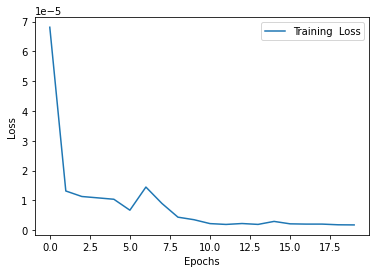

In [13]:
def training_loss_graph(history):
    plt.plot(history.history['loss'], label = 'Training  Loss')
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.show()
training_loss_graph(history)

In [14]:
def get_predicted_INV_scaled(X_test):
    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)
    
    
    prices = scaler.inverse_transform([y_test])
    return prices, predicted_prices
prices, predicted_prices = get_predicted_INV_scaled(X_test)

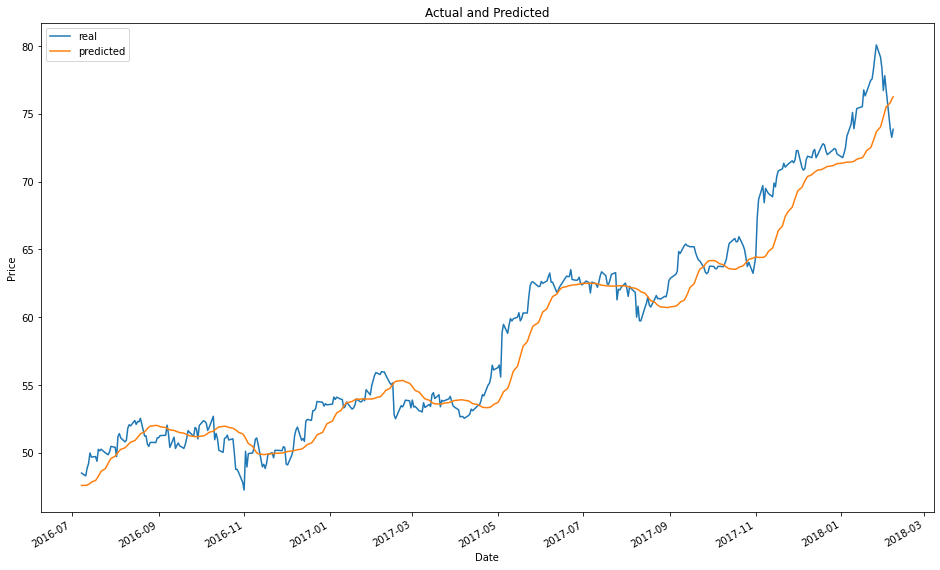

In [15]:
def show_graph_result(prices, predicted_prices):
    index = data.index.values[-len(prices[0]):]
    test_result = pd.DataFrame(columns = ['real', 'predicted'])
    test_result['real'] = prices[0]
    test_result['predicted'] = predicted_prices
    test_result.index = index
    
    test_result.plot(figsize = (16, 10))
    plt.title("Actual and Predicted")
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.show()
show_graph_result(prices, predicted_prices)